In [2]:
import twint
import pandas as pd

import nest_asyncio
nest_asyncio.apply()


In [3]:
t = twint.Config()
t.Username = 'ImranKhanPTI' #For specific user
t.Pandas = True

In [4]:
# t.Limit = 100
# twint.run.Search(t)
# twint.storage.panda.Tweets_df.to_csv("Ik_twitter_data.csv")

In [5]:
df = pd.read_csv("Ik_twitter_data.csv")

In [6]:
df.shape

(94, 39)

### Grabing Only English tweets Data

In [7]:
english_tweets_data = df[df['language'] == 'en']
english_tweets_data.shape

(47, 39)

In [8]:
english_tweets_data.head(4)

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
2,2,1560689133756076044,1560689133756076044,1.660932e+12,2022-08-19 23:04:20,500,NaN,The route has been altered and we will start t...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,1560684201359413248,1560684197420929025,1.660931e+12,2022-08-19 22:44:44,500,NaN,I am inviting everyone to join us tomorrow and...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,4,1560684197420929025,1560684197420929025,1.660931e+12,2022-08-19 22:44:43,500,NaN,Tomorrow I will be leading a rally after Maghr...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
7,7,1560604496065363971,1560604492152078336,1.660912e+12,2022-08-19 17:28:01,500,NaN,Who tortured Gill? There is a general percepti...,en,[],...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [9]:
english_tweets_data.columns

Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'date', 'timezone',
       'place', 'tweet', 'language', 'hashtags', 'cashtags', 'user_id',
       'user_id_str', 'username', 'name', 'day', 'hour', 'link', 'urls',
       'photos', 'video', 'thumbnail', 'retweet', 'nlikes', 'nreplies',
       'nretweets', 'quote_url', 'search', 'near', 'geo', 'source',
       'user_rt_id', 'user_rt', 'retweet_id', 'reply_to', 'retweet_date',
       'translate', 'trans_src', 'trans_dest'],
      dtype='object')

### Tweets data Only

In [10]:
en_tweets = english_tweets_data[['tweet']]

In [11]:

en_tweets.head(5)

,tweet
2,The route has been altered and we will start t...
3,I am inviting everyone to join us tomorrow and...
4,Tomorrow I will be leading a rally after Maghr...
7,Who tortured Gill? There is a general percepti...
8,All the pictures &amp; videos show clearly Gil...


### Using NLTK for word tokenizing and stopwords removal

In [12]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

### Applying word_tokenizer on tweets

In [13]:
sents = []
for sent in en_tweets.values:
    word = word_tokenize(sent[0])
    sents.append(word)
    

In [14]:
sents

[['The',
  'route',
  'has',
  'been',
  'altered',
  'and',
  'we',
  'will',
  'start',
  'the',
  'rally',
  'from',
  'Zero',
  'Point',
  'to',
  'F9',
  'Park',
  'tomorrow',
  'after',
  'Maghrib',
  '.'],
 ['I',
  'am',
  'inviting',
  'everyone',
  'to',
  'join',
  'us',
  'tomorrow',
  'and',
  'raise',
  'their',
  'voice',
  'in',
  'protest',
  '.'],
 ['Tomorrow',
  'I',
  'will',
  'be',
  'leading',
  'a',
  'rally',
  'after',
  'Maghrib',
  ',',
  'from',
  'China',
  'chowk',
  'to',
  'F9',
  'Park',
  ',',
  'in',
  'support',
  'of',
  'Dr',
  'Gill',
  '&',
  'amp',
  ';',
  'in',
  'protest',
  'against',
  'the',
  'torture',
  'inflicted',
  'on',
  'him',
  '.',
  'We',
  'will',
  'also',
  'be',
  'protesting',
  'against',
  'muzzling',
  'of',
  'Ary',
  'simply',
  'bec',
  'Ary',
  'did',
  "n't",
  'toe',
  'the',
  'official',
  'line',
  '&',
  'amp',
  ';',
  'gave',
  'coverage',
  'to',
  'our',
  'narrative',
  '.'],
 ['Who',
  'tortured',
  'Gil

### Removing Stops Words

In [15]:
stop_words = set(stopwords.words('english'))
filtered_sent = []
for w in sents:
    for word in w:
        if not word.lower() in stop_words:
            filtered_sent.append(word)

In [16]:
for word in filtered_sent:
    print(word)
    

route
altered
start
rally
Zero
Point
F9
Park
tomorrow
Maghrib
.
inviting
everyone
join
us
tomorrow
raise
voice
protest
.
Tomorrow
leading
rally
Maghrib
,
China
chowk
F9
Park
,
support
Dr
Gill
&
amp
;
protest
torture
inflicted
.
also
protesting
muzzling
Ary
simply
bec
Ary
n't
toe
official
line
&
amp
;
gave
coverage
narrative
.
tortured
Gill
?
general
perception
public
large
&
amp
;
minds
could
carried
gruesome
torture
.
Remember
public
react
.
leave
stone
unturned
find
responsible
&
amp
;
bring
justice
.
pictures
&
amp
;
videos
show
clearly
Gill
tortured
mentally
&
amp
;
physically
incl
sexual
abuse
-
gruesome
relate
.
humiliated
break
.
full
detailed
info
.
ICT
police
says
inflict
torture
.
question
:
https
:
//t.co/iGNczYChnt
Meanwhile
likes
NS
,
Maryam
,
MFR
,
AZ
,
worst
possible
way
&
amp
;
repeatedly
attacked
State
institutions
malicious
&
amp
;
targeted
statements
,
get
away
without
even
hint
reprimand
.
Descending
banana
republic
.
civilised
world
shocked
levels
barbarism
.
worst

Zafar
&
amp
;
team
.
want
thank
people
Punjab
coming
unprecedented
numbers
bye
elections
rigging
.
Strongly
condemn
fascist
Modi
govt
's
continuing
torture
Kashmiri
leader
Yasin
Malik
Tihar
jail
forcing
go
hunger
strike
.
life
extreme
danger
.
call
UNSG
,
UNHCHR
&
amp
;
internatonal
human
rights
orgs
take
action
India
&
amp
;
save
Yasin
Malik
's
life
.
video
says
Sharif
mafia
.
cant
bribed
must
eliminated
.
https
:
//t.co/wJ2vUdzI8k


## Using Spacy to apply NER and Lematization

In [17]:
import spacy
import re

In [18]:
nlp = spacy.load("en_core_web_sm")

In [51]:
text = ""
for w in filtered_sent:
    text= text + w + " "

text2 = ""
for i in re.findall("[a-zA-Z]*",text):
    if i != "":
        text2 = text2+i + " "

In [45]:
doc = nlp(text2)
label = [(X.text,X.label_) for X in doc.ents]
df4 = pd.DataFrame(label,columns = ['Word','Entity'])
df5 = df4[df4['Entity'] == "ORG"]
df6 = df5['Word'].value_counts()

### Data Visualization 

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\munir\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


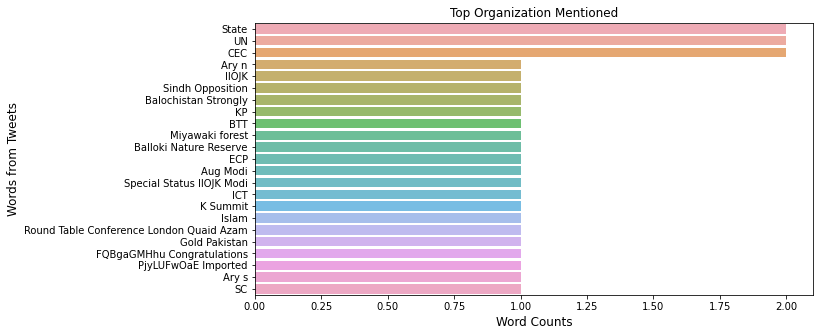

In [50]:
V_data = df6
plt.figure(figsize =(10,5))
sns.barplot(V_data.values,V_data.index,alpha=0.8)
plt.title("Top Organization Mentioned")
plt.ylabel("Words from Tweets",fontsize=12)
plt.xlabel('Word Counts',fontsize=12)
plt.show()